<h1 style='color:red' align='center'>Image Classification Using Convolutional Neural Network (CNN)</h1>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

This dataset comes from tensorflow itself

In [2]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

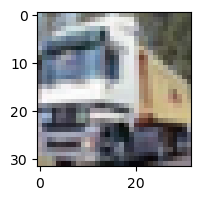

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

This X_train contains values in 4d array

In [5]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Here we see there are 50000 training images and 1000 test images

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for calssification we need our data in  1d. so we will convert this to  1D array

In [8]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

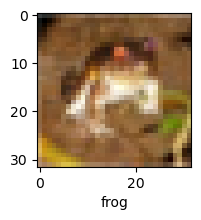

In [12]:
plot_sample(X_train, y_train, 0)

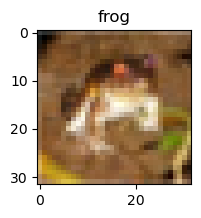

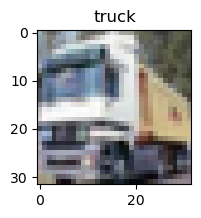

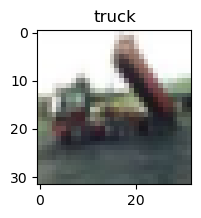

In [13]:
for i in range(3):
    plt.figure(figsize=(7,2))
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i]])

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

-  The <b>optimizer</b> is the algorithm responsible for updating the weights of the neural network during training in order to minimize the loss function. It determines how the network learns from the data.

-  The <b>loss function computes</b> the error between the predicted output of the neural network and the actual target values during training. It quantifies how well the model is performing.
<b>'sparse_categorical_crossentropy'</b> is the loss function used for multi-class classification problems where the target labels are integers. It calculates the cross-entropy loss between the predicted class probabilities and the true labels. The term "sparse" indicates that the labels are integers rather than one-hot encoded vectors.

-  <b>Metrics</b> are used to evaluate the performance of the model during training and testing. They provide additional information beyond the loss function.
'accuracy' is a common metric used for classification tasks. It calculates the proportion of correctly classified samples out of the total number of samples. In other words, it measures the percentage of predictions that match the true labels.


In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
#Stochastic Gradient Descent
#when to use categorical_crossentropy
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=7)

C:\Users\rashi\anaconda\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.3063 - loss: 1.9272
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4183 - loss: 1.6428
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4567 - loss: 1.5510
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4739 - loss: 1.4854
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4953 - loss: 1.4390
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.5072 - loss: 1.4013
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.5213 - loss: 1.3553


**You can see that at the end of 7 epochs, accuracy is at around 100%**

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes)," \n",confusion_matrix(y_test,y_pred_classes
                                                                                                 ))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.49      0.54      1000
           1       0.42      0.81      0.55      1000
           2       0.50      0.23      0.31      1000
           3       0.35      0.37      0.36      1000
           4       0.38      0.57      0.46      1000
           5       0.48      0.33      0.39      1000
           6       0.61      0.48      0.54      1000
           7       0.74      0.37      0.50      1000
           8       0.50      0.76      0.60      1000
           9       0.52      0.38      0.44      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000
  
 [[490  92  24  11  59  10  15   6 262  31]
 [ 17 808   3  12  10   6   7   7  74  56]
 [ 82  75 227 115 283  54  65  25  57  17]
 [ 28 128  39 374  98 133  75  16  52  57]

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')#sigmoid and softmax differerence
    #sigmoid gives you the probability directly but softmax gives you normalized probability
])

C:\Users\rashi\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.3781 - loss: 1.7088
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5954 - loss: 1.1497
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6472 - loss: 1.0097
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6844 - loss: 0.9090
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7080 - loss: 0.8312
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7302 - loss: 0.7738
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7556 - loss: 0.7076
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7689 - loss: 0.6649
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7852 - loss: 0.6181
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7984 - loss: 0.5800


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [25]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6901 - loss: 0.9366


[0.9433498382568359, 0.691100001335144]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[7.2755456e-02, 4.4475644e-04, 2.8049866e-02, 7.5108516e-01,
        9.0898253e-04, 5.7491977e-02, 4.1073550e-02, 2.2395018e-03,
        4.5111470e-02, 8.3930552e-04],
       [2.2172460e-02, 5.7040147e-02, 1.1542176e-05, 1.1983310e-05,
        4.2322853e-07, 7.8025764e-08, 5.5830162e-07, 9.9636988e-10,
        9.1704917e-01, 3.7136965e-03],
       [1.8692337e-01, 1.1560262e-01, 4.9359538e-04, 8.8595075e-04,
        1.6581835e-04, 2.7166963e-05, 7.6537770e-05, 3.3794902e-05,
        6.7755711e-01, 1.8234000e-02],
       [9.9032658e-01, 6.0611905e-04, 6.7615821e-03, 5.8634741e-05,
        3.8496606e-04, 9.7729490e-08, 1.7718049e-06, 6.2662144e-07,
        1.8109046e-03, 4.8753918e-05],
       [8.6643722e-06, 3.9058617e-05, 1.5450773e-02, 6.5623503e-03,
        8.3509696e-01, 1.6146636e-03, 1.4121403e-01, 2.0536230e-07,
        1.3224951e-05, 1.3319946e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

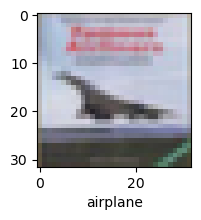

In [29]:
plot_sample(X_test, y_test,3)

In [30]:
classes[y_classes[3]]

'airplane'

In [31]:
classes[y_test[3]]

'airplane'